In [10]:
#1 Import the dataset (Housing.csv) and look at the top five rows
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
df=pd.read_csv("Housing.csv")
df.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


In [9]:
#2 Check the shape of the DataFrame (rows, columns)
df.shape

(545, 13)

In [11]:
#3 Look at the data types of the columns
df.dtypes

price                int64
area                 int64
bedrooms             int64
bathrooms            int64
stories              int64
mainroad            object
guestroom           object
basement            object
hotwaterheating     object
airconditioning     object
parking              int64
prefarea            object
furnishingstatus    object
dtype: object

In [12]:
#4 Check for missing  values if any, replace with appropriate values
df.isnull().sum()

price               0
area                0
bedrooms            0
bathrooms           0
stories             0
mainroad            0
guestroom           0
basement            0
hotwaterheating     0
airconditioning     0
parking             0
prefarea            0
furnishingstatus    0
dtype: int64

In [13]:
#5 Prepare  X (independent variables) and y (dependent variable)
x=df.drop(columns='price')
y=df['price']

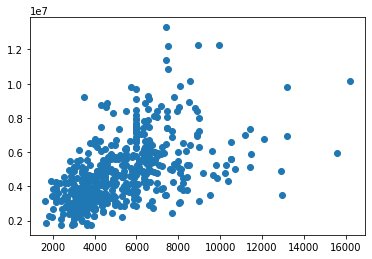

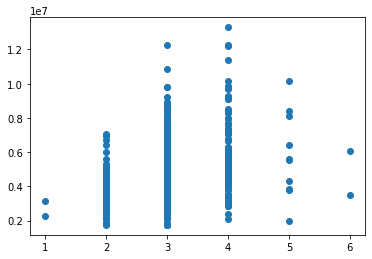

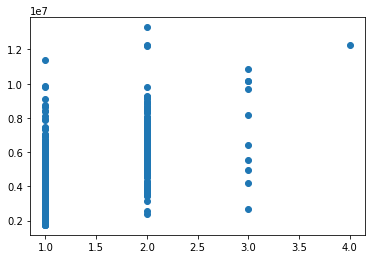

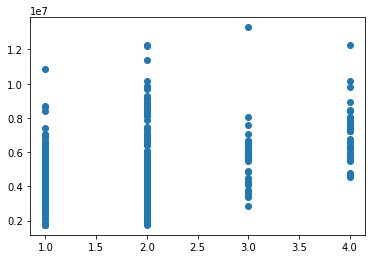

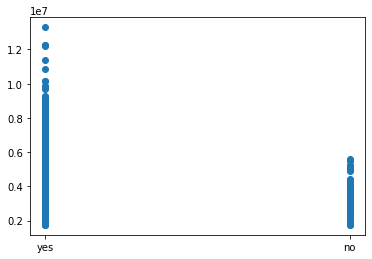

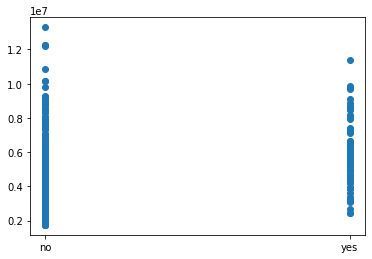

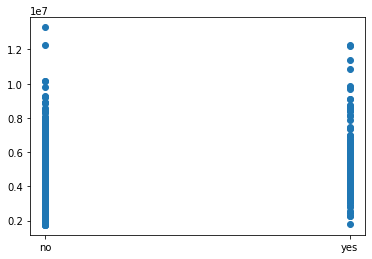

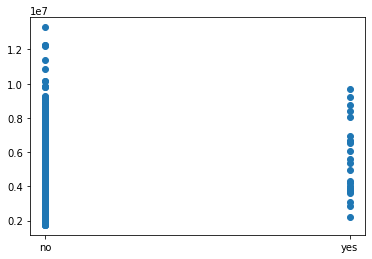

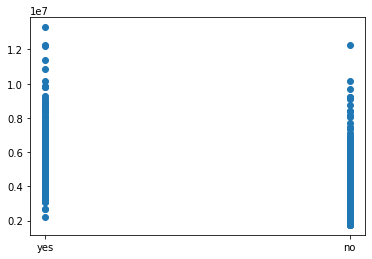

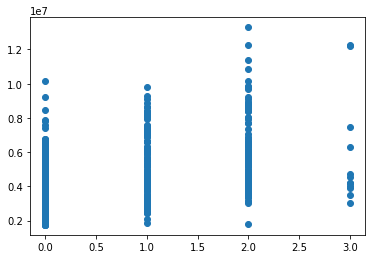

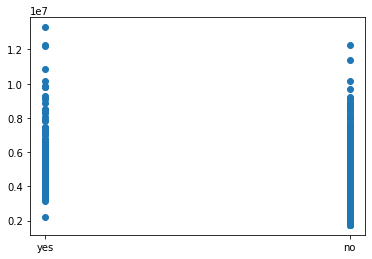

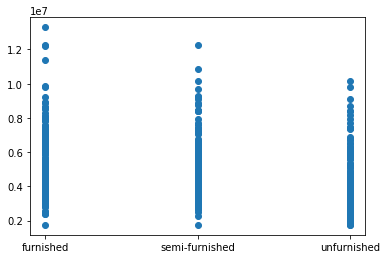

In [16]:
#6 Visualise the relationship between the independent variables and the depenedent variable using scatterplots
for i,col in enumerate(x.columns,1):
    plt.scatter(x[col],y=y)
    plt.show()

In [22]:
#7 Encoding categorical data in X
from sklearn.preprocessing import LabelEncoder
x=pd.get_dummies(x,drop_first=True)
label_encoders={}
for i in x.columns:
    x[i]=le.fit_transform(x[i])
    label_encoder=le


In [ ]:
#8  Avoiding the Dummy Variable Trap

In [26]:
#9 Apply feature scaling on numerical variables
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
num_col=df.select_dtypes(include='number').columns
df[num_col]=scaler.fit_transform(df[num_col])
df.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,4.566365,1.046726,1.403419,1.421812,1.378217,yes,no,no,no,yes,1.517692,yes,furnished
1,4.004484,1.757010,1.403419,5.405809,2.532024,yes,no,no,no,yes,2.679409,no,furnished
2,4.004484,2.218232,0.047278,1.421812,0.224410,yes,no,yes,no,no,1.517692,yes,semi-furnished
3,3.985755,1.083624,1.403419,1.421812,0.224410,yes,no,yes,no,yes,2.679409,yes,furnished
4,3.554979,1.046726,1.403419,-0.570187,0.224410,yes,yes,yes,no,yes,1.517692,no,furnished


In [28]:
#10 Split Data into Training and Testing Sets (70%-Train 30%-Test) - X_train, y_train, X_test, y_test
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.30,random_state=42)
x_train.shape,y_train.shape

((381, 13), (381,))

In [32]:
#11 Fitting Multiple Linear Regression to the Training
from sklearn.linear_model import LinearRegression
model=LinearRegression()
model.fit(x_train,y_train)

LinearRegression()

In [39]:
#12 Predict on the train set and calculate the error = y_pred - y_train
y_pred=model.predict(x_train)
y_pred

array([ 5506458.49958586,  3532736.00072848,  4473600.30621881,
        6568400.39311823,  6240788.83877659,  6124837.66555482,
        3045955.56492762,  4883477.91210078,  8623820.61374633,
        5247580.37603733,  7357672.14850714,  8113937.07570033,
        3511829.11221861,  6149357.23818627,  5513923.89683948,
        4495410.72048771,  3343187.94871556,  4100414.54024686,
        6565565.73608468,  5992308.37268056,  5374077.44308092,
        3733466.40624055,  6679836.75430058,  3141534.13183798,
        3021709.99133934,  2773088.14149793,  8721674.75606185,
        6170542.67761051,  6423028.99649869,  4614630.24689094,
        4720926.70537743,  7448403.37457547,  5371631.11286642,
        4173104.39265847,  2904529.41579909,  8515021.3766127 ,
        4697160.04387441,  5393950.94824746,  5879423.59096338,
        5636408.97009287,  2507760.280805  ,  5795005.2720467 ,
        3339258.57142286,  4744881.51503017,  7214391.75493604,
        5713901.10961803,  5411457.20070

126   -3.735415e+05
363   -1.772640e+05
370    8.336003e+05
31    -1.831600e+06
113    1.577888e+05
           ...     
71    -1.259889e+05
106    3.612569e+05
270    2.065475e+06
435   -3.854706e+05
102    9.435719e+05
Name: price, Length: 381, dtype: float64


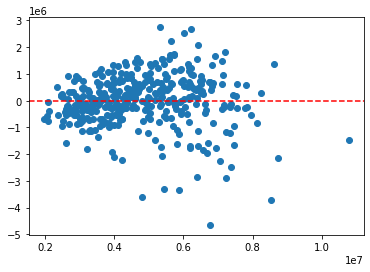

In [41]:
#13  Residual plot - plot y_pred in x axis and errors in y axis
error=y_pred-y_train
print(error)
plt.scatter(x=y_pred,y=error)
plt.axhline(y=0,color='red',linestyle="--")
plt.show()

In [45]:
#14  Predic on the test set
y_pred_test=model.predict(x_test)
print(y_pred_test)


[5642698.76976191 7211038.25335587 3170668.20613481 4655804.22167966
 3348225.07647525 3877078.10583711 5833367.25225591 6494385.05081926
 2649772.73047809 2468602.79904966 9659174.57004647 2839750.78151434
 3037922.22777063 3337459.41920899 3805190.97915818 5240939.36409205
 2775505.72295722 4935441.73632425 4731541.76056139 3826551.87826789
 5668181.29867913 5910803.65433745 2693998.85437365 4668900.986409
 5788025.3254743  7628892.68688214 3080168.83942541 5048169.39635279
 7384967.84855972 3203210.62538426 6311463.78562281 3209861.66979488
 6751681.94176696 4493008.70726985 3741899.3355653  5890253.85467856
 5112414.39800932 4114607.59647545 2974012.76925267 4387559.39135764
 4983752.29828007 3285952.82091992 7178648.9362135  4170917.22898224
 4069471.7568357  4422834.16374857 6813307.45402367 4254213.24731438
 4078642.16221016 3436748.49012868 7541553.32222146 2681059.43864801
 4743351.7806761  4609589.04574512 3708892.20349784 2549576.09190559
 7402781.34165318 2672182.69410016 4

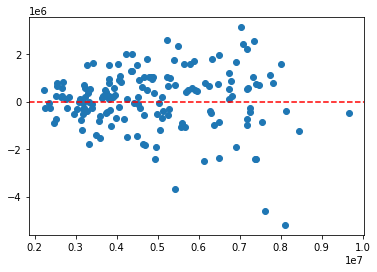

In [48]:
#15 Residual plot - plot y_pred in x axis and errors in y axis
error=y_pred_test-y_test
error
plt.scatter(y_pred_test,error)
plt.axhline(y=0,color='red',linestyle="--")
plt.show()

In [51]:
#16 Print Mean Squared Error and R Squared Value
import numpy as np
y_mean=np.mean(y_test)
mse=np.mean((y_test-y_pred_test)**2)
print(mse)
numerator=sum((y_test-y_pred_test)**2)
denaminator=sum((y_test-y_mean)**2)
r2=1-numerator/denaminator
r2

1560985679907.5923


0.6375188404709602

In [55]:
#17 Check  Adjusted R Squared Value(by selecting different no of input variables insted of all)
k=len(x.columns)
n=len(y_test)
for i in range(k):
    adj=1-(((1-r2)*(n-1))/(n-i-1))
    print(adj)


0.6375188404709602
0.635281302449176
0.6330159689240156
0.6307223187297907
0.6283998175897265
0.6260479177010538
0.6236660573042453
0.6212536602356828
0.6188101354630098
0.61633487660238
0.6138272614167746
0.6112866512945165
0.6087123907070631
